# PART 1

In [2]:
 import pandas as pd
from io import StringIO

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('https://query.data.world/s/442hmws6ei6qe3xfgbp6tdemtxxz7p')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#multi_level filter
df['gender']=='Male'

0       False
1        True
2        True
3        True
4       False
        ...  
7038     True
7039    False
7040    False
7041     True
7042     True
Name: gender, Length: 7043, dtype: bool

In [10]:
df[df['gender']=='Male']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df[(df['gender']=='Male') & (df['tenure']>20) & (df['Churn']=='No')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [12]:
df['PaymentMethod'].nunique()

4

In [13]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [15]:
df.shape[0]

7043

# PAYMENT METHOD CALCULATING IN PERCENTAGE 

In [17]:
round((df['PaymentMethod'].value_counts() / df.shape[0] * 100),2)

PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: count, dtype: float64

In [18]:
100 * df['PaymentMethod'].value_counts(normalize = True)

PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

# AGGREGATE METHOD

In [20]:
x = 13
y = 6

In [21]:
x //y

2

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
data = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService']]
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService
0,7590-VHVEG,Female,0,Yes,No,1,No
1,5575-GNVDE,Male,0,No,No,34,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes
3,7795-CFOCW,Male,0,No,No,45,No
4,9237-HQITU,Female,0,No,No,2,Yes
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes


In [24]:
df.groupby("gender")["tenure"].sum()

gender
Female    112469
Male      115521
Name: tenure, dtype: int64

In [25]:
df.groupby("gender").agg({'tenure' : 'max'}).reset_index()

,gender,tenure
0,Female,72
1,Male,72


In [26]:
df.groupby(['gender', 'Churn']).agg({'tenure' : 'mean', 'customerID' : 'count'})

tenure  customerID
gender Churn                       
Female No     37.858768        2549
       Yes    17.004260         939
Male   No     37.289524        2625
       Yes    18.963441         930

In [27]:
df.groupby(['Contract','Churn']).agg({'MonthlyCharges' : 'mean'})

MonthlyCharges
Contract       Churn                
Month-to-month No          61.462635
               Yes         73.019396
One year       No          62.508148
               Yes         85.050904
Two year       No          60.012477
               Yes         86.777083

# PIVOT TABLE

In [29]:
df.pivot_table(index = 'Churn', columns = 'Contract', values = 'MonthlyCharges', aggfunc = 'mean')

Contract,Month-to-month,One year,Two year
Churn,,,
No,61.462635,62.508148,60.012477
Yes,73.019396,85.050904,86.777083


# DROP COLUMN METHOD

In [31]:
# df.drop(columns = 'customerID',inplace = True) -> permant drop

df.drop(columns = 'customerID')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# DROP ROW METHOD

In [33]:
df.drop(index = 2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# CREATING NEW COLUMN USING FUNCTION

In [35]:
def t_b(x):
    if x<5:
        return "D"
    elif x>5 and x<20:
        return "C"
    elif x>=20 and x<50:
        return "B"
    else:
        return "A"

In [36]:
df['tenure_b'] = df['tenure'].apply(t_b)

# CREATING NEW COLUMN USING FUNCTION LAMBDA

In [38]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_b
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,D
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,B
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,D
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,B
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,B
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,A
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,C
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,D


 # PART 2

In [40]:
tenure_50 = df[df["tenure"] > 50].reset_index().drop( columns = "index")

In [41]:
tenure_50

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_b
0,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,A
1,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,A
2,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,A
3,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,A
4,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No,A
2101,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,A
2102,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,A
2103,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,A


In [42]:
tenure_50.shape

(2105, 22)

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_b
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,D
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,B
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,D
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,B
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,D


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

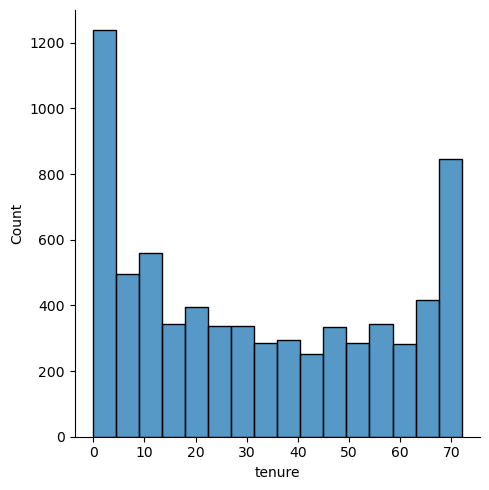

In [45]:
sns.displot(df['tenure'])

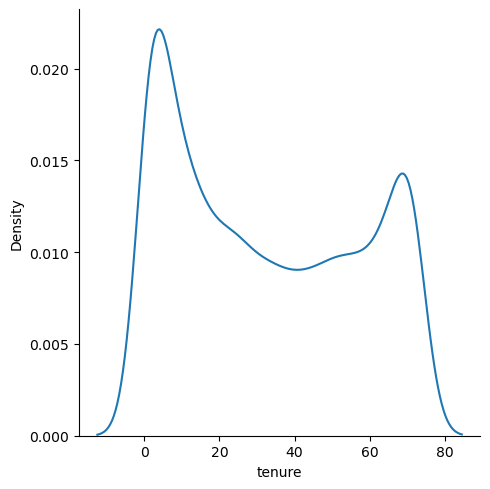

In [46]:
sns.displot(df['tenure'], kind = 'kde')

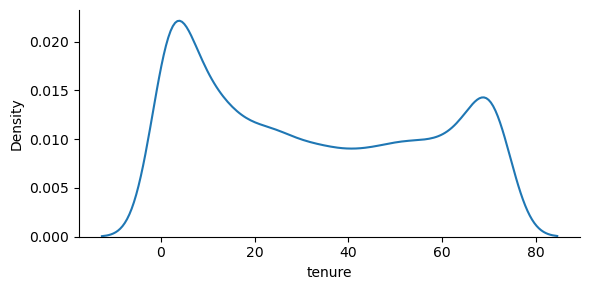

In [47]:
sns.displot(df['tenure'], kind = 'kde', height = 3, aspect = 2)

<Axes: xlabel='tenure'>

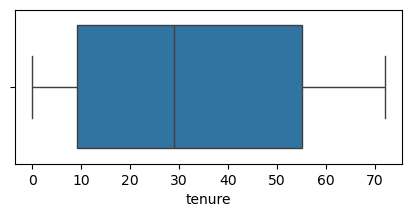

In [48]:
plt.figure(figsize = (5,2))
sns.boxplot(x= df['tenure'])

<Axes: xlabel='MonthlyCharges'>

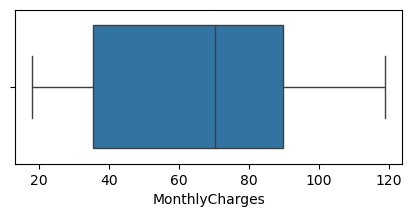

In [49]:
plt.figure(figsize = (5,2))
sns.boxplot(x= df['MonthlyCharges'])

# SUB PLOT GRAPH

<Axes: title={'center': 'Non-Churn MonthlyCharges'}, xlabel='MonthlyCharges'>

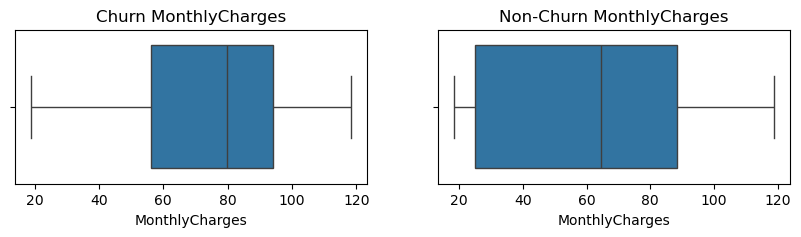

In [51]:
plt.figure(figsize = (10,2))

plt.subplot(1,2,1)
plt.title("Churn MonthlyCharges")
sns.boxplot(x = df[df['Churn']=='Yes']['MonthlyCharges'])

plt.subplot(1,2,2)
plt.title("Non-Churn MonthlyCharges")
sns.boxplot(x = df[df['Churn']=='No']['MonthlyCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

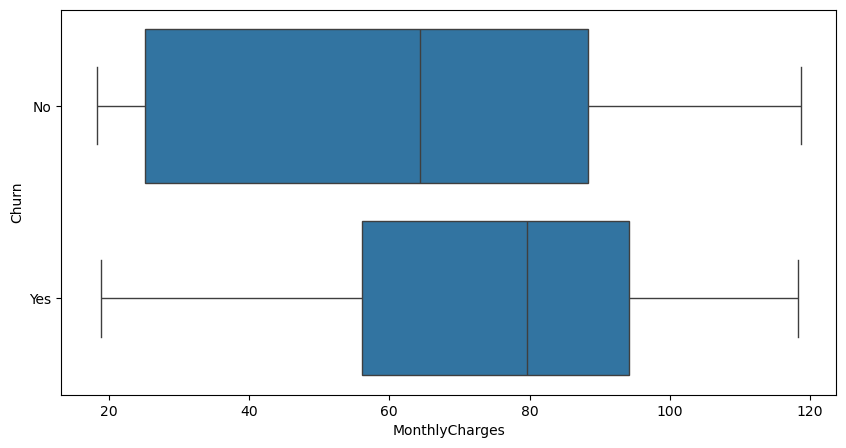

In [52]:
plt.figure(figsize = (10,5))
sns.boxplot(y = df['Churn'], x = df['MonthlyCharges'])

In [53]:
tenure_50

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_b
0,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,A
1,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,A
2,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,A
3,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,A
4,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No,A
2101,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,A
2102,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,A
2103,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,A


In [54]:
tenure_50[["MonthlyCharges", "Churn"]]

,MonthlyCharges,Churn
0,56.15,No
1,100.35,No
2,113.25,No
3,20.65,No
4,106.70,No
...,...,...
2100,60.00,No
2101,102.95,Yes
2102,21.15,No
2103,103.20,No


In [55]:
b = df.groupby("InternetService")["MonthlyCharges"].sum().reset_index()

In [56]:
b

,InternetService,MonthlyCharges
0,DSL,140665.35
1,Fiber optic,283284.40
2,No,32166.85


Text(0, 0.5, 'Average Monthly Charges')

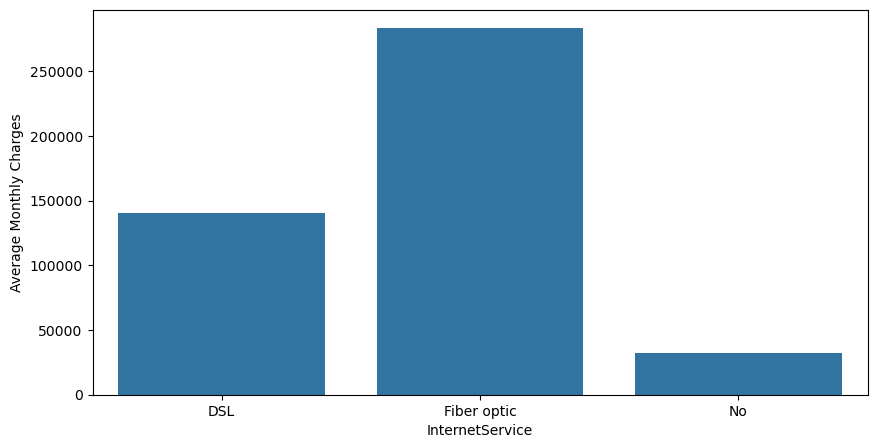

In [57]:
plt.figure(figsize = (10,5))
sns.barplot(x = b['InternetService'], y = b['MonthlyCharges'])
plt.ylabel("Average Monthly Charges")

# COUNTPLOT GRAPH USING HUE PARAMETER

<Axes: xlabel='InternetService', ylabel='count'>

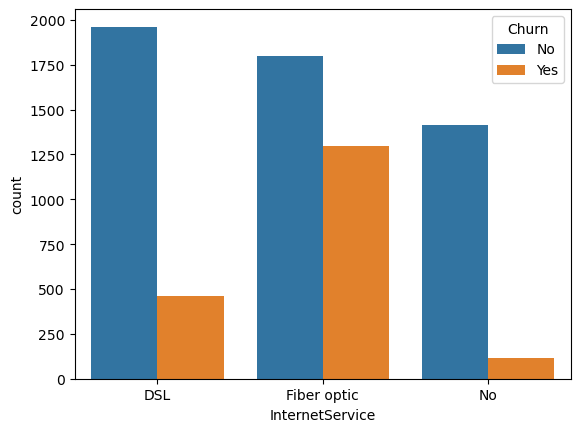

In [59]:
sns.countplot(x = df['InternetService'], hue = df['Churn'])

# PART 3

# WEB SCRAPING

In [62]:
import requests

In [63]:
url = 'https://en.wikipedia.org/wiki/Human_body_weight'

In [64]:
response = requests.get(url, headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'})

In [65]:
response

<Response [200]>

In [66]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Human body weight - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-f

In [67]:
from bs4 import BeautifulSoup

In [68]:
out = BeautifulSoup(response.text, "html.parser")

In [69]:
out

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Human body weight - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [70]:
out.find('table', {'class':'wikitable'})

<table class="wikitable sortable">
<tbody><tr>
<th>Region
</th>
<th>Adult <br/> population<br/>(millions)
</th>
<th>Average weight
</th>
<th>% <br/> Overweight
</th>
<th><style data-mw-deduplicate="TemplateStyles:r1038841319">.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}</style><span class="rt-commentedText tooltip tooltip-dotted" title="Reference">Ref</span>
</th></tr>
<tr>
<td><a href="/wiki/Africa" title="Africa">Africa</a></td>
<td>535</td>
<td>60.7 kg (133.8 lb)</td>
<td>28.9%</td>
<td><sup class="reference" id="cite_ref-biomed_11-0"><a href="#cite_note-biomed-11"><span class="cite-bracket">[</span>11<span class="cite-bracket">]</span></a></sup>
</td></tr>
<tr>
<td><a href="/wiki/Asia" title="Asia">Asia</a></td>
<td>2,815</td>
<td>57.7 kg (127.2 lb)</td>
<td>24.2%</td>
<td><sup class="reference" id="cite_ref-biomed_11-1"><a href="#cite_note-biomed-11"><span class="cite-bracket">[</span>11<span class="cite-bracket">]</span></a></sup>
</td></tr>
<tr>
<td><a

In [71]:
l = out.find_all('table', {'class':'wikitable'})

# EXTRACTING LIST OF TABLE 

In [73]:
html_string = str(l[0])

In [74]:
a = pd.read_html(StringIO(html_string))

In [75]:
fd = a[0]

In [76]:
fd.shape

(7, 5)

In [77]:
fd.head()

,Region,Adult population (millions),Average weight,% Overweight,Ref
0,Africa,535,60.7 kg (133.8 lb),28.9%,[11]
1,Asia,2815,57.7 kg (127.2 lb),24.2%,[11]
2,Europe,606,70.8 kg (156.1 lb),55.6%,[11]
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,[11]
4,North America,263,80.7 kg (177.9 lb),73.9%,[11]


In [78]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Region                       7 non-null      object
 1   Adult population (millions)  7 non-null      int64 
 2   Average weight               7 non-null      object
 3   % Overweight                 7 non-null      object
 4   Ref                          7 non-null      object
dtypes: int64(1), object(4)
memory usage: 412.0+ bytes


In [79]:
fd.drop(columns = 'Ref',inplace = True)

In [80]:
fd.head()

,Region,Adult population (millions),Average weight,% Overweight
0,Africa,535,60.7 kg (133.8 lb),28.9%
1,Asia,2815,57.7 kg (127.2 lb),24.2%
2,Europe,606,70.8 kg (156.1 lb),55.6%
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%
4,North America,263,80.7 kg (177.9 lb),73.9%


In [81]:
fd['Average weight']

0    60.7 kg (133.8 lb)
1    57.7 kg (127.2 lb)
2    70.8 kg (156.1 lb)
3    67.9 kg (149.7 lb)
4    80.7 kg (177.9 lb)
5    74.1 kg (163.4 lb)
6    62.0 kg (136.7 lb)
Name: Average weight, dtype: object

In [82]:
aw = '60.7kg (133.8 lb)'

In [83]:
aw.split("(")[1]

'133.8 lb)'

In [84]:
import re

In [85]:
float(re.findall("\d+\.\d+",aw.split("(")[1])[0])

133.8

In [86]:
fd['Avearge weight (kg)'] = fd['Average weight'].apply(lambda x: float(re.findall("\d+\.\d+",x.split("(")[0])[0]))

In [87]:
fd['Avearge weight (kg)']

0    60.7
1    57.7
2    70.8
3    67.9
4    80.7
5    74.1
6    62.0
Name: Avearge weight (kg), dtype: float64

In [88]:
fd.head()

,Region,Adult population (millions),Average weight,% Overweight,Avearge weight (kg)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7
1,Asia,2815,57.7 kg (127.2 lb),24.2%,57.7
2,Europe,606,70.8 kg (156.1 lb),55.6%,70.8
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,67.9
4,North America,263,80.7 kg (177.9 lb),73.9%,80.7


In [89]:
fd['Avearge weight (lbs)'] = fd['Average weight'].apply(lambda x: float(re.findall("\d+\.\d+",x.split("(")[1])[0]))

In [90]:
fd['Avearge weight (lbs)']

0    133.8
1    127.2
2    156.1
3    149.7
4    177.9
5    163.4
6    136.7
Name: Avearge weight (lbs), dtype: float64

In [91]:
fd.head()

,Region,Adult population (millions),Average weight,% Overweight,Avearge weight (kg),Avearge weight (lbs)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7,133.8
1,Asia,2815,57.7 kg (127.2 lb),24.2%,57.7,127.2
2,Europe,606,70.8 kg (156.1 lb),55.6%,70.8,156.1
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,67.9,149.7
4,North America,263,80.7 kg (177.9 lb),73.9%,80.7,177.9


In [92]:
fd.drop(columns = 'Average weight',inplace = True)

In [93]:
fd.head()

,Region,Adult population (millions),% Overweight,Avearge weight (kg),Avearge weight (lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,57.7,127.2
2,Europe,606,55.6%,70.8,156.1
3,Latin America and the Caribbean,386,57.9%,67.9,149.7
4,North America,263,73.9%,80.7,177.9


In [94]:
fd.rename(columns = {'% Overweight': 'Overweight (%)'},inplace = True)

In [95]:
fd.head()

,Region,Adult population (millions),Overweight (%),Avearge weight (kg),Avearge weight (lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,57.7,127.2
2,Europe,606,55.6%,70.8,156.1
3,Latin America and the Caribbean,386,57.9%,67.9,149.7
4,North America,263,73.9%,80.7,177.9


In [96]:
fd['Overweight (%)']

0    28.9%
1    24.2%
2    55.6%
3    57.9%
4    73.9%
5    63.3%
6    34.7%
Name: Overweight (%), dtype: object

In [97]:
ow = '28.9%'

In [98]:
float(re.findall("\d+\.\d+",ow)[0])

28.9

In [99]:
fd['Overweight (%)']= fd['Overweight (%)'].apply(lambda x:float(re.findall("\d+\.\d+",x)[0]))

In [100]:
fd['Overweight (%)']

0    28.9
1    24.2
2    55.6
3    57.9
4    73.9
5    63.3
6    34.7
Name: Overweight (%), dtype: float64

In [101]:
fd.head()

,Region,Adult population (millions),Overweight (%),Avearge weight (kg),Avearge weight (lbs)
0,Africa,535,28.9,60.7,133.8
1,Asia,2815,24.2,57.7,127.2
2,Europe,606,55.6,70.8,156.1
3,Latin America and the Caribbean,386,57.9,67.9,149.7
4,North America,263,73.9,80.7,177.9


<Figure size 1000x200 with 0 Axes>

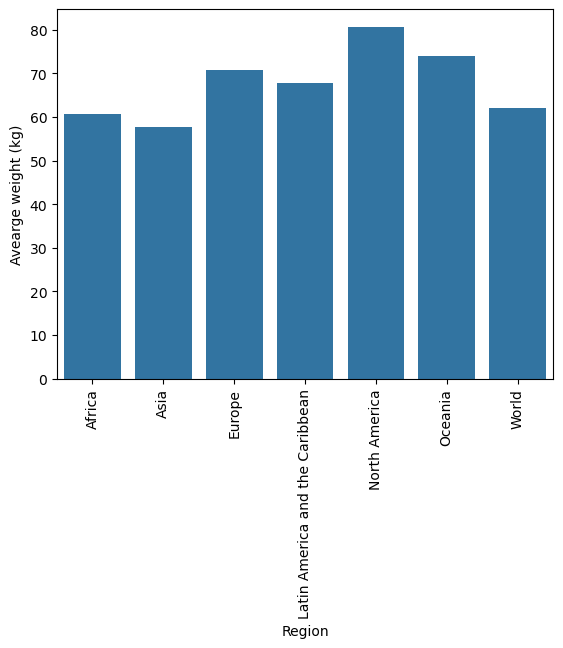

<Figure size 1000x200 with 0 Axes>

In [224]:
sns.barplot(x = fd['Region'], y = fd['Avearge weight (kg)'])
plt.xticks(rotation = 90)
plt.figure(figsize = (10,2))